<a href="https://colab.research.google.com/github/anikpaul00/CODE-FORCES-SOLUTION/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nodoubttome/skin-cancer9-classesisic")

print("Path to dataset files:", path)

100%|██████████| 786M/786M [00:11<00:00, 74.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nodoubttome/skin-cancer9-classesisic/versions/1


# **Data Load and Augmentation**

In [2]:
import os


dataset_path = '/root/.cache/kagglehub/datasets/nodoubttome/skin-cancer9-classesisic/versions/1/Skin cancer ISIC The International Skin Imaging Collaboration/'

# subfolders
class_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]


class_distribution = {}

# counting class
for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)
    num_files = len(os.listdir(class_path))
    class_distribution[class_folder] = num_files


print("Class Distribution:")
for class_name, count in class_distribution.items():
    print(f"{class_name}: {count} files")


Class Distribution:
Test: 9 files
Train: 9 files


In [ ]:
# augmentation part

In [3]:
import os
import cv2
import numpy as np
import albumentations as A
from tqdm import tqdm


In [4]:
dataset_path = '/root/.cache/kagglehub/datasets/nodoubttome/skin-cancer9-classesisic/versions/1/Skin cancer ISIC The International Skin Imaging Collaboration/Train'

TARGET_IMAGES_PER_CLASS = 500

In [5]:
import albumentations as A

augmentation = A.Compose([
    A.Rotate(limit=15, p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.GaussNoise(var_limit=(5, 25), p=0.2),
    A.CLAHE(clip_limit=2.0, p=0.3),
    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=15, val_shift_limit=10, p=0.3),
    A.ElasticTransform(alpha=1, sigma=50, p=0.3),
    A.CoarseDropout(max_holes=3, holes=([5, 5, 20, 20]), p=0.2)
])


<ipython-input-5-ce16c6fafdec>:6: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(5, 25), p=0.2),
<ipython-input-5-ce16c6fafdec>:10: UserWarning: Argument(s) 'max_holes, holes' are not valid for transform CoarseDropout
  A.CoarseDropout(max_holes=3, holes=([5, 5, 20, 20]), p=0.2)


In [6]:
import os


root_dir = '/root/.cache/kagglehub/datasets/nodoubttome/skin-cancer9-classesisic/versions/1/Skin cancer ISIC The International Skin Imaging Collaboration/'  # Replace with your directory


for item in os.listdir(root_dir):
    print(item)


subfolder_name = 'Train'
subfolder_path = os.path.join(root_dir, subfolder_name)
if os.path.exists(subfolder_path):
    print(f"Subfolder '{subfolder_name}' exists at: {subfolder_path}")
else:
    print(f"Subfolder '{subfolder_name}' does not exist at: {subfolder_path}")

Test
Train
Subfolder 'Train' exists at: /root/.cache/kagglehub/datasets/nodoubttome/skin-cancer9-classesisic/versions/1/Skin cancer ISIC The International Skin Imaging Collaboration/Train


In [7]:
# images inside class
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in os.listdir(dataset_path)}

print("Current class distribution:")
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")


Current class distribution:
vascular lesion: 139 images
melanoma: 438 images
basal cell carcinoma: 376 images
squamous cell carcinoma: 181 images
actinic keratosis: 114 images
seborrheic keratosis: 77 images
pigmented benign keratosis: 462 images
dermatofibroma: 95 images
nevus: 357 images


In [8]:
# augmentation of Train folder
# Process each class separately
for cls, count in class_counts.items():
    class_dir = os.path.join(dataset_path, cls)
    images = os.listdir(class_dir)

    # Calculate how many images to generate
    images_to_generate = TARGET_IMAGES_PER_CLASS - count
    if images_to_generate <= 0:
        continue  # Skip if already sufficient

    print(f"Augmenting {cls}: Need {images_to_generate} more images...")

    for i in tqdm(range(images_to_generate)):
        # Select a random image
        img_name = np.random.choice(images)
        img_path = os.path.join(class_dir, img_name)

        # Load image
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Apply augmentation
        augmented = augmentation(image=image)['image']

        # Save new image
        new_img_name = f"aug_{i}_{img_name}"
        new_img_path = os.path.join(class_dir, new_img_name)
        cv2.imwrite(new_img_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))


Augmenting vascular lesion: Need 361 more images...


100%|██████████| 361/361 [00:08<00:00, 44.26it/s]


Augmenting melanoma: Need 62 more images...


100%|██████████| 62/62 [00:02<00:00, 21.89it/s]


Augmenting basal cell carcinoma: Need 124 more images...


100%|██████████| 124/124 [00:03<00:00, 37.43it/s]


Augmenting squamous cell carcinoma: Need 319 more images...


100%|██████████| 319/319 [00:05<00:00, 56.01it/s]


Augmenting actinic keratosis: Need 386 more images...


100%|██████████| 386/386 [00:08<00:00, 44.54it/s]


Augmenting seborrheic keratosis: Need 423 more images...


100%|██████████| 423/423 [00:18<00:00, 23.07it/s]


Augmenting pigmented benign keratosis: Need 38 more images...


100%|██████████| 38/38 [00:00<00:00, 55.83it/s]


Augmenting dermatofibroma: Need 405 more images...


100%|██████████| 405/405 [00:08<00:00, 49.77it/s]


Augmenting nevus: Need 143 more images...


100%|██████████| 143/143 [00:18<00:00,  7.84it/s]


In [9]:

final_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in os.listdir(dataset_path)}

print("\nFinal class distribution after augmentation:")
for cls, count in final_counts.items():
    print(f"{cls}: {count} images")



Final class distribution after augmentation:
vascular lesion: 500 images
melanoma: 500 images
basal cell carcinoma: 500 images
squamous cell carcinoma: 500 images
actinic keratosis: 500 images
seborrheic keratosis: 500 images
pigmented benign keratosis: 500 images
dermatofibroma: 500 images
nevus: 500 images


In [30]:
test_dataset_path = '/root/.cache/kagglehub/datasets/nodoubttome/skin-cancer9-classesisic/versions/1/Skin cancer ISIC The International Skin Imaging Collaboration/Test'
TARGET_IMAGES_PER_CLASS = 100

In [31]:
# Augmentation of Test folder

# Process each class separately in the Test folder
for cls in os.listdir(test_dataset_path):
    class_dir = os.path.join(test_dataset_path, cls)

    if not os.path.isdir(class_dir):  # Skip if not a directory
        continue

    images = os.listdir(class_dir)

    # Calculate how many images to generate
    images_to_generate = TARGET_IMAGES_PER_CLASS - len(images)
    if images_to_generate <= 0:
        continue  # Skip if already sufficient

    print(f"Augmenting {cls}: Need {images_to_generate} more images...")

    for i in tqdm(range(images_to_generate)):
        # Select a random image
        img_name = np.random.choice(images)
        img_path = os.path.join(class_dir, img_name)

        # Check if the file is an image
        if not img_name.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff')):
            continue  # Skip non-image files

        # Load image
        image = cv2.imread(img_path)

        # Check if image is successfully loaded
        if image is None:
            print(f"Failed to load image {img_path}")
            continue  # Skip this image and move to the next

        # Convert to RGB for augmentation
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Apply augmentation
        augmented = augmentation(image=image)['image']

        # Save new image back to the same class folder
        new_img_name = f"aug_{i}_{img_name}"
        new_img_path = os.path.join(class_dir, new_img_name)  # Save in the same folder
        cv2.imwrite(new_img_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))


Augmenting vascular lesion: Need 85 more images...


100%|██████████| 85/85 [00:01<00:00, 68.23it/s]


Augmenting melanoma: Need 83 more images...


100%|██████████| 83/83 [00:07<00:00, 11.33it/s]


Augmenting basal cell carcinoma: Need 83 more images...


100%|██████████| 83/83 [00:01<00:00, 57.89it/s]


Augmenting squamous cell carcinoma: Need 83 more images...


100%|██████████| 83/83 [00:39<00:00,  2.08it/s]


Augmenting actinic keratosis: Need 83 more images...


100%|██████████| 83/83 [00:01<00:00, 56.50it/s]


Augmenting seborrheic keratosis: Need 96 more images...


100%|██████████| 96/96 [00:02<00:00, 34.57it/s]


Augmenting pigmented benign keratosis: Need 83 more images...


100%|██████████| 83/83 [00:01<00:00, 62.56it/s]


Augmenting dermatofibroma: Need 83 more images...


100%|██████████| 83/83 [00:52<00:00,  1.58it/s]


Augmenting nevus: Need 83 more images...


100%|██████████| 83/83 [00:04<00:00, 19.65it/s]


In [35]:

final_counts = {cls: len(os.listdir(os.path.join(test_dataset_path, cls))) for cls in os.listdir(test_dataset_path)}

print("\nFinal class distribution after augmentation:")
for cls, count in final_counts.items():
    print(f"{cls}: {count} images")



Final class distribution after augmentation:
vascular lesion: 96 images
melanoma: 98 images
basal cell carcinoma: 95 images
squamous cell carcinoma: 95 images
actinic keratosis: 95 images
seborrheic keratosis: 78 images
pigmented benign keratosis: 94 images
dermatofibroma: 98 images
nevus: 93 images


# **Dataset train and test part**

In [37]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader



# Dataset paths
dataset_path = "/root/.cache/kagglehub/datasets/nodoubttome/skin-cancer9-classesisic/versions/1/Skin cancer ISIC The International Skin Imaging Collaboration/"  # Change this
train_dir = f"{dataset_path}/Train"
test_dir = f"{dataset_path}/Test"


train_dataset = datasets.ImageFolder(root=train_dir)
test_dataset = datasets.ImageFolder(root=test_dir)


batch_size = 32

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)


print(f"Test dataset size: {len(test_dataset)}")



Test dataset size: 1615


In [38]:
# new training and validation
from torch.utils.data import DataLoader

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# Use test_dataset for validation
val_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2)

# Print dataset info
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size (from test dataset): {len(test_dataset)}")


Train dataset size: 4500
Validation dataset size (from test dataset): 1615


In [ ]:
# old training and validation dataset creation
from torch.utils.data import random_split

# split ratio
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size


train_subset, val_subset = random_split(train_dataset, [train_size, val_size])


batch_size = 32
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False, num_workers=4)

# Print dataset info
print(f"New Train dataset size: {len(train_subset)}")
print(f"Validation dataset size: {len(val_subset)}")
print(f"Test dataset size (unchanged): {len(test_dataset)}")


New Train dataset size: 7920
Validation dataset size: 1980
Test dataset size (unchanged): 118


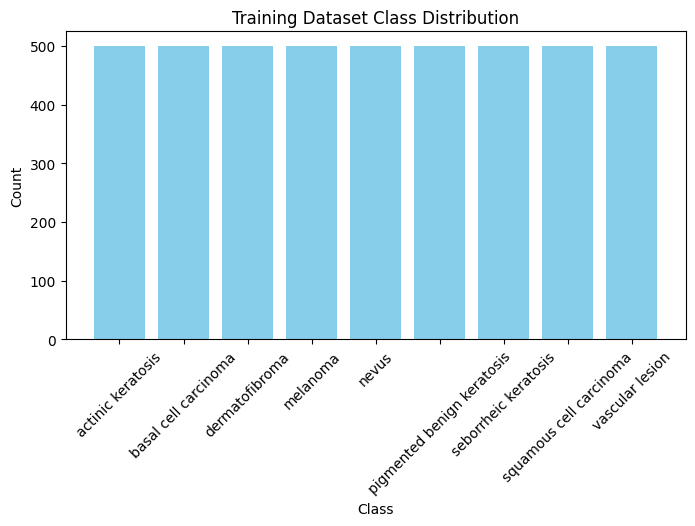

In [12]:
import matplotlib.pyplot as plt

# Count class frequencies directly
class_counts = [0] * len(train_dataset.classes)
for _, label in train_dataset:
    class_counts[label] += 1

# Plot
plt.figure(figsize=(8, 4))
plt.bar(train_dataset.classes, class_counts, color='skyblue')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Training Dataset Class Distribution")
plt.xticks(rotation=45)
plt.show()


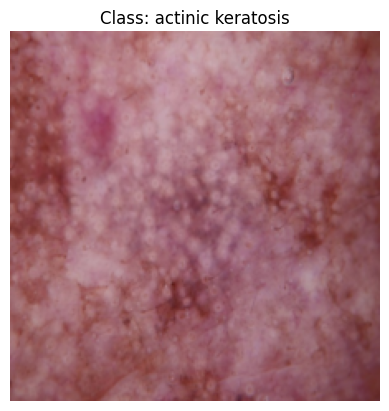

In [46]:
# Update transformations with resizing and normalization in [0,1]
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to ViT input size
    transforms.ToTensor(),  # Converts image to [0,1] range
])

# Apply new transform to datasets
train_dataset.transform = transform
test_dataset.transform = transform

# Verify the transformation by displaying an image
import matplotlib.pyplot as plt
import numpy as np
import random

# Get a random sample from the training dataset
random_index = random.randint(0, len(train_dataset) - 1)
image, label = train_dataset[random_index]

# Convert tensor to NumPy for display
image = image.numpy().transpose((1, 2, 0))  # Convert (C, H, W) -> (H, W, C)

# Plot the image
plt.imshow(image)
plt.title(f"Class: {train_dataset.classes[label]}")
plt.axis("off")
plt.show()


# **Model Part**

In [47]:
# old model part
import torch
import timm
import torch.nn as nn
import torch.nn.functional as F

class CustomMobileViT(nn.Module):
    def __init__(self, num_classes):
        super(CustomMobileViT, self).__init__()
        # Load MobileViT backbone without classifier head
        self.backbone = timm.create_model("mobilevit_xs", pretrained=True, num_classes=0)

        # Feature extractor
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)

        # Custom classification head
        self.custom_head = nn.Sequential(
            nn.Linear(self.backbone.num_features, 512),
            nn.BatchNorm1d(512),  # Improve stability
            nn.ReLU(),
            nn.Dropout(0.5),  # Reduce overfitting
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.backbone.forward_features(x)  #  deep features
        x = self.global_avg_pool(x).flatten(1)  # Global average pooling I think for stability
        x = self.custom_head(x)  # Classification head
        return x


num_classes = len(train_dataset.classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomMobileViT(num_classes).to(device)

print(model)


CustomMobileViT(
  (backbone): ByobNet(
    (stem): ConvNormAct(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNormAct2d(
        16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): SiLU(inplace=True)
      )
    )
    (stages): Sequential(
      (0): Sequential(
        (0): BottleneckBlock(
          (conv1_1x1): ConvNormAct(
            (conv): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn): BatchNormAct2d(
              64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
              (drop): Identity()
              (act): SiLU(inplace=True)
            )
          )
          (conv2_kxk): ConvNormAct(
            (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
            (bn): BatchNormAct2d(
              64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=

In [48]:
import torch.optim as optim

#loss function
criterion = nn.CrossEntropyLoss()

#optimizer
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)

#learning rate scheduler
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=1e-6)

print("Training components set up: Loss, Optimizer, Scheduler")


Training components set up: Loss, Optimizer, Scheduler


In [49]:
num_epochs = 10

for epoch in range(num_epochs):
    # --------- Training Phase ---------
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for images, labels in train_loader:  # Iterate over training batches
        # Move data to device (GPU/CPU)
        images, labels = images.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update training accuracy
        _, predicted = torch.max(outputs, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

        # Update training loss
        running_loss += loss.item()

    # Training Accuracy and Loss
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_predictions / total_samples

    # --------- Validation Phase ---------
    model.eval()  # Set model to evaluation mode (no gradients)
    val_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():  # Disable gradient computation
        for images, labels in val_loader:  # Iterate over validation batches
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)

            # Compute validation loss
            loss = criterion(outputs, labels)

            # Update validation accuracy
            _, predicted = torch.max(outputs, 1)
            total_samples += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

            # Update validation loss
            val_loss += loss.item()

    # Validation Accuracy and Loss
    val_loss /= len(val_loader)
    val_accuracy = 100 * correct_predictions / total_samples

    # --------- Adjust Learning Rate ---------
    scheduler.step()

    # --------- Print Metrics ---------
    print(f"Epoch [{epoch+1}/{num_epochs}]")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%")
    print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%\n")


Epoch [1/10]
Train Loss: 2.0511, Train Accuracy: 24.69%
Val Loss: 1.6917, Val Accuracy: 40.99%

Epoch [2/10]
Train Loss: 1.4262, Train Accuracy: 51.93%
Val Loss: 1.4292, Val Accuracy: 49.29%

Epoch [3/10]
Train Loss: 1.0920, Train Accuracy: 64.09%
Val Loss: 1.2836, Val Accuracy: 53.44%

Epoch [4/10]
Train Loss: 0.9050, Train Accuracy: 70.40%
Val Loss: 1.2480, Val Accuracy: 55.05%

Epoch [5/10]
Train Loss: 0.7696, Train Accuracy: 74.89%
Val Loss: 1.2443, Val Accuracy: 56.35%



KeyboardInterrupt: 

In [ ]:
# Training loop with accuracy and no validation yet
num_epochs = 5

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for images, labels in train_loader:  # Use DataLoader for batch processing
        # Send images and labels to the GPU if available
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Calculate loss
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

        # Update running loss
        running_loss += loss.item()

    # Calculate accuracy for the epoch
    accuracy = 100 * correct_predictions / total_samples

    # Adjust learning rate after each epoch
    scheduler.step()

    # Print loss and accuracy every epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%")


Epoch [1/10], Loss: 1.2844, Accuracy: 56.32%
Epoch [2/10], Loss: 0.7163, Accuracy: 74.68%
Epoch [3/10], Loss: 0.5098, Accuracy: 81.78%
Epoch [4/10], Loss: 0.3978, Accuracy: 86.02%
Epoch [5/10], Loss: 0.2922, Accuracy: 89.65%
Epoch [6/10], Loss: 0.2322, Accuracy: 92.09%
Epoch [7/10], Loss: 0.1823, Accuracy: 93.82%
Epoch [8/10], Loss: 0.1509, Accuracy: 94.70%
Epoch [9/10], Loss: 0.1272, Accuracy: 95.49%
Epoch [10/10], Loss: 0.1184, Accuracy: 96.01%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Class names (assuming `train_dataset.classes` contains class names)
class_names = train_dataset.classes

# Set model to evaluation mode
model.eval()

# Initialize lists to store results
actual_labels = []
predicted_labels = []
image_samples = []

# Initialize counters for accuracy
correct_predictions = 0
total_samples = 0

# Disable gradient calculation for evaluation
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)

        # Get predictions
        _, predicted = torch.max(outputs, 1)

        # Accuracy calculation
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        # Convert to CPU for visualization
        images = images.cpu()
        labels = labels.cpu()
        predicted = predicted.cpu()

        # Store results
        actual_labels.extend(labels.numpy())
        predicted_labels.extend(predicted.numpy())
        image_samples.extend(images.numpy())

# Calculate and display test accuracy
test_accuracy = 100 * correct_predictions / total_samples
print(f"\n✅ Test Accuracy: {test_accuracy:.2f}%")

# Print first 20 samples (actual vs predicted)
print("\nSample Predictions:")
for i in range(10):  # Change number if needed
    print(f"Actual: {class_names[actual_labels[i]]}, Predicted: {class_names[predicted_labels[i]]}")



✅ Test Accuracy: 55.93%

Sample Predictions:
Actual: actinic keratosis, Predicted: nevus
Actual: actinic keratosis, Predicted: nevus
Actual: actinic keratosis, Predicted: actinic keratosis
Actual: actinic keratosis, Predicted: actinic keratosis
Actual: actinic keratosis, Predicted: actinic keratosis
Actual: actinic keratosis, Predicted: nevus
Actual: actinic keratosis, Predicted: actinic keratosis
Actual: actinic keratosis, Predicted: nevus
Actual: actinic keratosis, Predicted: nevus
Actual: actinic keratosis, Predicted: nevus


# **Own Testing**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ISIC_0000002.jpg to ISIC_0000002.jpg


In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Ensure your model is in evaluation mode
model.eval()

# Class names from your dataset
class_names = train_dataset.classes

# Image preprocessing (match the same as used during training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize to ViT input size
    transforms.ToTensor(),           # Convert to tensor
])

# Function to predict class from local image
def predict_image(image_path):
    # Load and preprocess the image
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

    # Move image to GPU if available
    image_tensor = image_tensor.to(device)

    # Perform prediction
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted_idx = torch.max(output, 1)

    predicted_class = class_names[predicted_idx.item()]

    # Display image with prediction
    plt.imshow(image)
    plt.title(f"Predicted Class: {predicted_class}")
    plt.axis("off")
    plt.show()

    print(f"✅ Predicted Class: {predicted_class}")



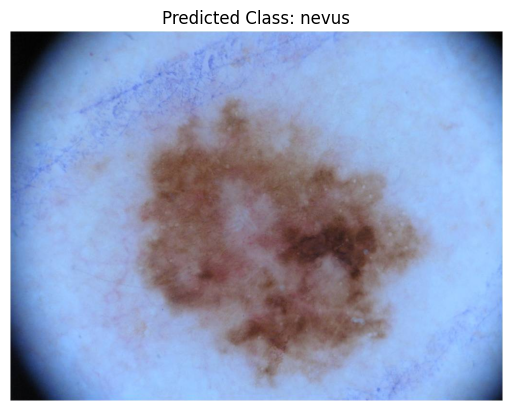

✅ Predicted Class: nevus


In [ ]:
# Example usage (replace with your local path)
image_path = "/content/ISIC_0000002.jpg"
predict_image(image_path)


In [ ]:
# replace validation using Test folder data